<a href="https://colab.research.google.com/github/ZiqiLi379/STATS-302-Intro-to-ML/blob/main/STATS302_Week_2_Boston_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 2 - Boston Dataset
###STATS 302 Principle of Machine Learning
###Duke Kunshan University

In [ ]:
import pandas as pd
import numpy as np

# from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from google.colab import files
import io

load_boston is deprecated in 1.0 and will be removed in 1.2.

More detail:
https://scikit-learn.org/1.1/modules/generated/sklearn.datasets.load_boston.html

Load the dataset by yourself:
https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

In [ ]:
# loading the dataset
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['boston.csv']))
data = data.drop(data.columns[0], axis=1)
print(data.shape)
data.head()

# boston = load_boston()
# print("type of boston = ", type(boston))
# print(boston.keys())
# print(boston.feature_names)
# print(boston.data.shape)
# print(boston.DESCR)

KeyError: 'boston.csv'

<Axes: xlabel='LSTAT', ylabel='MEDV'>

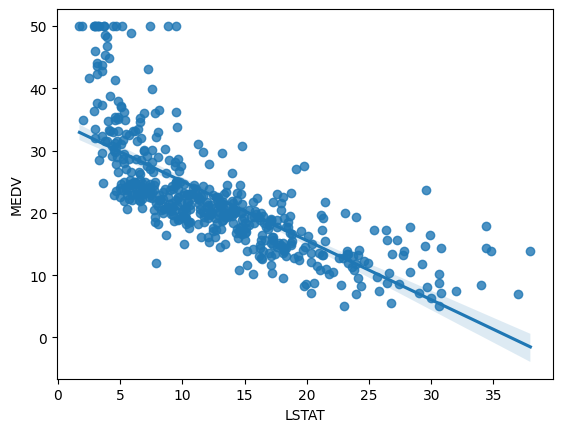

In [ ]:
sns.regplot(x = data['LSTAT'], y = data['MEDV'])

In [ ]:
# est = smf.ols(y ~ x,data)

# The basic syntax of ols is smf.ols(formula, data)

est = smf.ols('MEDV ~ LSTAT',data = data).fit() #ols is ordinary least squares

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        03:36:22   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

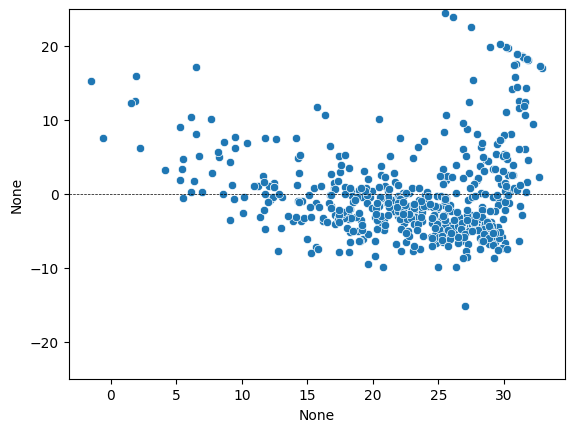

In [ ]:
#dist of residuals
plt.ylim(-25,25)
sns.scatterplot(x = est.fittedvalues, y = est.resid)
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'black')

# Multiple Regression

In [ ]:
string_cols = ' + '.join(data.columns[:-1])
est = smf.ols('MEDV ~ {}'.format(string_cols),data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.9
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          1.23e-133
Time:                        03:36:55   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3090.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.3797      5.143      6.879      0.0

In [ ]:
#removing AGE and INDUS
string_cols = ' + '.join(data.columns[:-1].difference(['AGE','INDUS']))
est = smf.ols('MEDV ~ {}'.format(string_cols),data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     137.2
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          9.95e-136
Time:                        03:37:01   Log-Likelihood:                -1504.4
No. Observations:                 506   AIC:                             3031.
Df Residuals:                     495   BIC:                             3077.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.2255      5.107      6.898      0.0

# Interaction term

An interaction occurs when an independent variable has a different effect on the outcome depending on the values of another independent variable. A significant interaction term means a better fit to the data, and better predictions from the regression equation.

In [ ]:
est = smf.ols('MEDV ~ LSTAT*AGE',data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           4.86e-88
Time:                        03:37:11   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [ ]:
#adding power term
tmp = data.copy()
tmp['LSTAT_2'] = tmp['LSTAT']**2
est = smf.ols('MEDV ~ LSTAT + LSTAT_2',data = tmp).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          1.56e-112
Time:                        03:37:14   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.8620      0.872     49.149      0.0

In [ ]:
#adding power term
# tmp = data.copy()
# tmp['LSTAT_2'] = tmp['LSTAT']**2
est = smf.ols('MEDV ~ np.power(LSTAT,5)',data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     73.35
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           1.32e-16
Time:                        03:37:16   Log-Likelihood:                -1805.9
No. Observations:                 506   AIC:                             3616.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.6291      0